<a href="https://colab.research.google.com/github/gio-bis/MLPNS2021/blob/main/Galaxy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import tensorflow as tf

In [64]:
from tensorflow import keras
import pylab as pl

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
cd /content/drive/My\ Drive/

/content/drive/My Drive


In [67]:
!ls

 all_ones_benchmark.zip
 all_zeros_benchmark.zip
 busBusses.npy
 busTimeTable.npy
 CEDIT_6_5_Friuli_Italy_1976.cpg
 CEDIT_6_5_Friuli_Italy_1976.dbf
 CEDIT_6_5_Friuli_Italy_1976.prj
 CEDIT_6_5_Friuli_Italy_1976.sbn
 CEDIT_6_5_Friuli_Italy_1976.sbx
 CEDIT_6_5_Friuli_Italy_1976.shp
 CEDIT_6_5_Friuli_Italy_1976.shp.xml
 CEDIT_6_5_Friuli_Italy_1976.shx
'CEDIT_6_5_Friuli_Italy_1976.zip?raw=true'
'CEDIT_6_5_Friuli_Italy_1976.zip?raw=true.1'
 central_pixel_benchmark.zip
'chimica rel (1).docx.gdoc'
'chimica rel.docx.gdoc'
'Colab Notebooks'
'Copia di Goldstein H. - Meccanica Classica -Pdf - Ita- (2a edizione).pdf'
 country_pop.xls
 e68ceb0a193e4e378b29255b62ab75e0_0.geojson
 e68ceb0a193e4e378b29255b62ab75e0_0.geojson.1
'Fisica I - Meccanica e Termodinamica - Mazzoldi,  Nigro, Voci.pdf'
 healthcare-dataset-stroke-data.csv
 HiggsBosonCompetition_AMSMetric_rev1.py
 images_test_rev1.zip
 images_training_rev1
 images_training_rev1.zip
 ispalindrome.py
 kaggle.json
 kalbar_drone_190113-768x512.jpg
'La

In [68]:
!chmod 600 kaggle.jason

chmod: cannot access 'kaggle.jason': No such file or directory


In [69]:
import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [70]:
os.environ["KAGGLE_USERNAME"]

'giorgiabiselli'

In [71]:
!kaggle competitions download -c galaxy-zoo-the-galaxy-challenge

images_training_rev1.zip: Skipping, found more recently modified local copy (use --force to force download)
images_test_rev1.zip: Skipping, found more recently modified local copy (use --force to force download)
all_zeros_benchmark.zip: Skipping, found more recently modified local copy (use --force to force download)
central_pixel_benchmark.zip: Skipping, found more recently modified local copy (use --force to force download)
all_ones_benchmark.zip: Skipping, found more recently modified local copy (use --force to force download)
training_solutions_rev1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip images_training_rev1.zip

In [73]:
#this takes a long time **the first time around**
!ls images_training_rev1

Output streaming troncato alle ultime 5000 righe.
178173.jpg  329682.jpg	476954.jpg  626682.jpg	775249.jpg  926425.jpg
178196.jpg  329689.jpg	476981.jpg  626718.jpg	775273.jpg  926426.jpg
178261.jpg  329720.jpg	477003.jpg  626741.jpg	775308.jpg  926435.jpg
178271.jpg  329736.jpg	477013.jpg  626742.jpg	775321.jpg  926446.jpg
178276.jpg  329752.jpg	477016.jpg  626748.jpg	775335.jpg  926448.jpg
178305.jpg  329754.jpg	477023.jpg  626757.jpg	775344.jpg  926453.jpg
178358.jpg  329786.jpg	477039.jpg  626770.jpg	775351.jpg  926462.jpg
178391.jpg  329807.jpg	477057.jpg  626787.jpg	775352.jpg  926478.jpg
178400.jpg  329813.jpg	477058.jpg  626793.jpg	775384.jpg  926480.jpg
178410.jpg  329818.jpg	477077.jpg  626796.jpg	775405.jpg  926484.jpg
178422.jpg  329835.jpg	477087.jpg  626800.jpg	775413.jpg  926488.jpg
178434.jpg  329866.jpg	477103.jpg  626804.jpg	775416.jpg  926509.jpg
178451.jpg  329875.jpg	477132.jpg  626808.jpg	775448.jpg  926522.jpg
178454.jpg  329878.jpg	477139.jpg  626821.jpg	775450.

In [74]:
!unzip training_solutions_rev1.zip

Archive:  training_solutions_rev1.zip
replace training_solutions_rev1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [75]:
import pandas as pd
training_labels = pd.read_csv("training_solutions_rev1.csv")

In [76]:
import pylab as pl
import cv2
import numpy as np

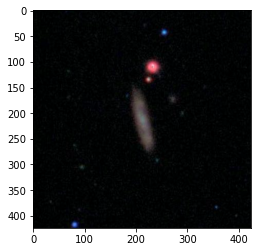

In [77]:
img = np.asarray(cv2.imread("images_training_rev1/313205.jpg"))
pl.imshow(img);

In [79]:
import glob
ims = np.zeros([1000, img.shape[0], img.shape[1], img.shape[2]], dtype=np.uint8)
for i,im in enumerate(glob.glob("images_training_rev1/*")[:1000]):
  if i%10 == 0:
    print ("index", i, end="\r", flush=True)
  ims[i] = np.asarray( cv2.imread(im))

In [80]:
ims.shape

(1000, 424, 424, 3)

In [81]:
training_labels

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,0.000000,0.104752,0.512101,0.000000,0.054453,0.945547,0.201463,0.181684,0.000000,0.00000,0.027226,0.000000,0.027226,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,0.000000,0.236781,0.160941,0.234877,0.189149,0.810851,0.000000,0.135082,0.191919,0.00000,0.000000,0.140353,0.000000,0.048796,0.000000,0.000000,0.012414,0.0,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,0.000000,0.117790,0.059562,0.000000,0.000000,1.000000,0.000000,0.741864,0.023853,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,0.000000,0.000000,0.113284,0.125280,0.320398,0.679602,0.408599,0.284778,0.000000,0.00000,0.000000,0.096119,0.096119,0.000000,0.128159,0.000000,0.000000,0.0,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029383,0.970617,0.494587,0.439252,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.029383,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,0.043458,0.260804,0.000000,0.126152,0.245734,0.754266,0.000000,0.410816,0.099563,0.03514,0.000000,0.000000,0.000000,0.175454,0.035140,0.000000,0.059207,0.0,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,0.000000,0.045378,0.053406,0.000000,0.127644,0.872356,0.404841,0.496375,0.000000,0.00000,0.000000,0.021321,0.000000,0.062095,0.044229,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,0.000000,0.257128,0.347328,0.055958,0.839186,0.160814,0.030477,0.172364,0.000000,0.00000,0.000000,0.033567,0.134270,0.067135,0.604214,0.000000,0.116962,0.0,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,0.000000,0.227114,0.545764,0.090673,0.864000,0.136000,0.045500,0.045500,0.000000,0.09072,0.000000,0.090720,0.136512,0.045792,0.500256,0.000000,0.045450,0.0,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


In [83]:
nga = training_labels["Class1.3"] #probabilità che l'oggetto non sia una galassia
spi = training_labels[["Class5.1", "Class5.2", "Class5.3", "Class5.4"]].max(axis=1) #prob che la galassia sia a spirale
ell = training_labels["Class6.2"]
irr = training_labels[["Class8.1", "Class8.2", "Class8.3", "Class8.4", "Class8.5", "Class8.6", "Class8.7"]].max(axis=1)
training_labels2 = pd.DataFrame({"nga": nga, "spi":spi, "ell":ell, "irr":irr})

In [84]:
training_labels2

,nga,spi,ell,irr
0,0.000000,0.512101,0.945547,0.027226
1,0.009222,0.236781,0.810851,0.140353
2,0.056931,0.117790,1.000000,0.000000
3,0.068059,0.125280,0.679602,0.128159
4,0.066161,0.000000,0.970617,0.029383
...,...,...,...,...
61573,0.000000,0.260804,0.754266,0.175454
61574,0.000000,0.053406,0.872356,0.062095
61575,0.019783,0.347328,0.160814,0.604214
61576,0.000000,0.545764,0.136000,0.500256


In [87]:
newclass = [np.where(training_labels2.iloc[i] == np.max(training_labels2.iloc[i]))[0][0] 
            for i in range(len(training_labels2))]

In [88]:
newclass

[2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,


In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ims[:, ::2,::2,:], np.array(newclass[:1000]), test_size=0.33, random_state=42)

In [103]:
X_train.shape

(670, 212, 212, 3)

In [101]:
#x_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
#x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
#input_shape = (img_rows, img_cols, 1)

AttributeError: ignored

In [109]:
batch_size = 128
num_classes = 4
epochs = 50
input_shape = X_train[0].shape

In [105]:

import tensorflow as tf
from tensorflow import keras

In [106]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [108]:
from keras.optimizers import Adam

# Set Optimizer
opt = Adam(lr=0.001, decay=1e-6)

In [110]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5), padding="same", 
                             activation="relu", 
                             input_shape= input_shape, 
                             kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(MaxPooling2D(2))
model.add(Conv2D(16, kernel_size=(5, 5), padding="same", 
                             activation="relu", 
                             kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(64, activation="relu",
                            kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dense(4, activation="softmax"))


In [113]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LambdaCallback, EarlyStopping

patience = EarlyStopping(patience=5)
filepath = "galcheckpoints/cnn-improvement-{epoch:02d}-{loss:.4f}.hd5" 
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, 
                             save_best_only=True, mode='min')

In [115]:
model.compile(optimizer= opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [116]:
# you can skip this and load the saved model
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_split=0.2,
                    batch_size=batch_size, verbose=1,
                    callbacks=[patience])#, checkpoint])

Epoch 1/50
5/5 [==============================] - 34s 199ms/step - loss: 50.9750 - accuracy: 0.6723 - val_loss: 13.8902 - val_accuracy: 0.8433
Epoch 2/50
5/5 [==============================] - 0s 81ms/step - loss: 8.1331 - accuracy: 0.8818 - val_loss: 1.2771 - val_accuracy: 0.8433
Epoch 3/50
5/5 [==============================] - 0s 82ms/step - loss: 0.8952 - accuracy: 0.8940 - val_loss: 1.1942 - val_accuracy: 0.8433
Epoch 4/50
5/5 [==============================] - 0s 79ms/step - loss: 1.1449 - accuracy: 0.8929 - val_loss: 1.2938 - val_accuracy: 0.8433
Epoch 5/50
5/5 [==============================] - 0s 80ms/step - loss: 1.1635 - accuracy: 0.9006 - val_loss: 1.1239 - val_accuracy: 0.8433
Epoch 6/50
5/5 [==============================] - 0s 80ms/step - loss: 0.9053 - accuracy: 0.8966 - val_loss: 0.8812 - val_accuracy: 0.8433
Epoch 7/50
5/5 [==============================] - 0s 79ms/step - loss: 0.6273 - accuracy: 0.8893 - val_loss: 1.1219 - val_accuracy: 0.8433
Epoch 8/50
5/5 [=======